In [10]:
%load_ext autoreload
%autoreload 2
%pylab inline

import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import xgboost as xgb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


In [101]:
train_df = pd.read_csv('./data/train_2016_v2.csv')
props_df = pd.read_csv('./data/properties_2016.csv')

/home/mtambos/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2683: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [102]:
train_df = train_df.merge(props_df, on='parcelid', how='left')
#report = ProfileReport(train_df)
train_df.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [7]:
train_df.columns

Index(['parcelid', 'logerror', 'transactiondate', 'airconditioningtypeid',
       'architecturalstyletypeid', 'basementsqft', 'bathroomcnt', 'bedroomcnt',
       'buildingclasstypeid', 'buildingqualitytypeid', 'calculatedbathnbr',
       'decktypeid', 'finishedfloor1squarefeet',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
       'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50',
       'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt',
       'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcn

In [152]:
X = train_df.drop(['parcelid', 'logerror', 'transactiondate', 'propertyzoningdesc',
                   'propertycountylandusecode'], axis=1)
y = train_df['logerror'].values

train_columns = X.columns

In [153]:
# set nan values in *sqft* columns to 0
X.loc[:, X.columns.str.contains('sqft')] = X.loc[:, X.columns.str.contains('sqft')].fillna(0)
X.loc[:, X.columns.str.contains('sqft')]

,basementsqft,garagetotalsqft,yardbuildingsqft17,yardbuildingsqft26
0,0.0,0.0,0.0,0.0
1,0.0,468.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,598.0,0.0,0.0
5,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0


In [154]:
# set nan values in *squarefeet* columns to 0
X.loc[:, X.columns.str.contains('squarefeet')] = X.loc[:, X.columns.str.contains('squarefeet')].fillna(0)
X.loc[:, X.columns.str.contains('squarefeet')]

,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,lotsizesquarefeet
0,0.0,1684.0,1684.0,0.0,0.0,0.0,0.0,7528.0
1,0.0,2263.0,2263.0,0.0,0.0,0.0,0.0,3643.0
2,0.0,2217.0,2217.0,0.0,0.0,0.0,0.0,11423.0
3,0.0,839.0,839.0,0.0,0.0,0.0,0.0,70859.0
4,0.0,2283.0,2283.0,0.0,0.0,0.0,0.0,6000.0
5,0.0,3067.0,3067.0,0.0,0.0,0.0,0.0,2708.0
6,0.0,1297.0,1297.0,0.0,0.0,0.0,0.0,6677.0
7,853.0,1763.0,1763.0,0.0,0.0,853.0,0.0,0.0
8,0.0,796.0,796.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1260.0,1260.0,0.0,0.0,0.0,0.0,0.0


In [155]:
# drop columns with std 0
X = X.drop(['buildingclasstypeid', 'pooltypeid10', 'pooltypeid7',
            'storytypeid', 'poolcnt', 'assessmentyear'], axis=1, errors='ignore')

In [141]:
# fill NaNs in *typeid* columns to -1
X.loc[:, X.columns.str.contains('typeid')] = X.loc[:, X.columns.str.contains('typeid')].fillna(-1)
X.loc[:, X.columns.str.contains('typeid')]

,airconditioningtypeid,architecturalstyletypeid,buildingqualitytypeid,decktypeid,heatingorsystemtypeid,pooltypeid2,propertylandusetypeid,typeconstructiontypeid
0,1.0,-1.0,4.0,-1.0,2.0,-1.0,261.0,-1.0
1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,261.0,-1.0
2,1.0,-1.0,4.0,-1.0,2.0,-1.0,261.0,-1.0
3,1.0,-1.0,4.0,-1.0,2.0,-1.0,266.0,-1.0
4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,261.0,-1.0
5,1.0,-1.0,1.0,-1.0,2.0,-1.0,261.0,-1.0
6,-1.0,-1.0,7.0,-1.0,7.0,-1.0,261.0,-1.0
7,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,266.0,-1.0
8,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,266.0,-1.0
9,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,266.0,-1.0


In [156]:
# set nan values in *cnt* columns to 0
X.loc[:, X.columns.str.contains('cnt')] = X.loc[:, X.columns.str.contains('cnt')].fillna(0)
X.loc[:, X.columns.str.contains('cnt')]

,bathroomcnt,bedroomcnt,fireplacecnt,fullbathcnt,garagecarcnt,roomcnt,unitcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt
0,2.0,3.0,0.0,2.0,0.0,0.0,1.0,122754.0,360170.0,237416.0
1,3.5,4.0,0.0,3.0,2.0,0.0,0.0,346458.0,585529.0,239071.0
2,3.0,2.0,0.0,3.0,0.0,0.0,1.0,61994.0,119906.0,57912.0
3,2.0,2.0,0.0,2.0,0.0,0.0,1.0,171518.0,244880.0,73362.0
4,2.5,4.0,0.0,2.0,2.0,8.0,0.0,169574.0,434551.0,264977.0
5,4.0,4.0,0.0,4.0,0.0,0.0,1.0,880650.0,2447951.0,1567301.0
6,1.0,2.0,0.0,1.0,0.0,0.0,1.0,64549.0,111521.0,46972.0
7,2.5,3.0,1.0,2.0,2.0,6.0,0.0,107000.0,306000.0,199000.0
8,1.0,2.0,0.0,1.0,1.0,0.0,0.0,66834.0,210064.0,143230.0
9,2.0,2.0,0.0,2.0,1.0,5.0,0.0,109977.0,190960.0,80983.0


In [157]:
# set NaNs in rest of counts/sums columns to 0
cols = ['calculatedbathnbr', 'poolsizesum', 'threequarterbathnbr', 'numberofstories']
X.loc[:, cols] = X.loc[:, cols].fillna(0)

In [144]:
# set NaNs in rest of id/code columns to 0
cols = ['regionidcity', 'regionidneighborhood', 'regionidzip', 'censustractandblock']
X.loc[:, cols] = X.loc[:, cols].fillna(-1)

In [158]:
# set NaNs in rest of dates columns to mean
cols = ['yearbuilt', 'taxamount', 'taxdelinquencyyear']
X.loc[:, cols] = X.loc[:, cols].fillna(X.loc[:, cols].mean())
X.loc[:, cols]

,yearbuilt,taxamount,taxdelinquencyyear
0,1959.0,6735.88,13.402692
1,2014.0,10153.02,13.402692
2,1940.0,11484.48,13.402692
3,1987.0,3048.74,13.402692
4,1981.0,5488.96,13.402692
5,1982.0,27126.57,13.402692
6,1939.0,2304.97,13.402692
7,1994.0,3745.50,13.402692
8,1984.0,2172.88,13.402692
9,1977.0,1940.26,13.402692


In [159]:
X1 = X.copy()
for c in X1.dtypes[X1.dtypes == object].index.values:
    X1[c] = (X1[c] is True)

X_train, X_test, y_train, y_test =\
    train_test_split(X1, y, test_size=0.2, random_state=0)

X_train, X_val, y_train, y_val =\
    train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [117]:
mask = model.feature_importances_ > 0
X_train = X_train.loc[:, mask]
X_val = X_val.loc[:, mask]
X_test = X_test.loc[:, mask]

def log_transf(df):
    df.loc[:, 'structuretaxvaluedollarcnt'] = np.log1p(df.structuretaxvaluedollarcnt).copy()
    df.loc[:, 'taxvaluedollarcnt'] = np.log1p(df.taxvaluedollarcnt).copy()
    df.loc[:, 'calculatedfinishedsquarefeet'] = np.log1p(df.calculatedfinishedsquarefeet).copy()
    df.loc[:, 'lotsizesquarefeet'] = np.log1p(df.lotsizesquarefeet).copy()
    df.loc[:, 'finishedsquarefeet12'] = np.log1p(df.finishedsquarefeet12).copy()
    return df

import warnings

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    X_train = log_transf(X_train)
    X_val = log_transf(X_val)
    X_test = log_transf(X_test)

In [161]:
from sklearn.model_selection import RandomizedSearchCV

param_space = {}

cv = RandomizedSearchCV()

In [171]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test)

params = {}
params['booster'] = 'dart'
params['eta'] = 0.1
params['objective'] = 'reg:linear'
params['eval_metric'] = 'mae'
params['max_depth'] = 8
#params['silent'] = 1

watchlist = [(dtrain, 'train'), (dval, 'valid')]
model = xgb.train(params, dtrain, 10000, watchlist, early_stopping_rounds=100)

y_pred = model.predict(dtest)
mean_absolute_error(y_test, y_pred)

[0]	train-mae:0.448802	valid-mae:0.448757
Multiple eval metrics have been passed: 'valid-mae' will be used for early stopping.

Will train until valid-mae hasn't improved in 100 rounds.
[1]	train-mae:0.405694	valid-mae:0.40587
[2]	train-mae:0.367054	valid-mae:0.36741
[3]	train-mae:0.332468	valid-mae:0.332981
[4]	train-mae:0.301538	valid-mae:0.302169
[5]	train-mae:0.273831	valid-mae:0.274628
[6]	train-mae:0.249084	valid-mae:0.250043
[7]	train-mae:0.227034	valid-mae:0.228088
[8]	train-mae:0.2074	valid-mae:0.208542
[9]	train-mae:0.189881	valid-mae:0.191171
[10]	train-mae:0.174349	valid-mae:0.17572
[11]	train-mae:0.160526	valid-mae:0.162026
[12]	train-mae:0.148278	valid-mae:0.149889
[13]	train-mae:0.13745	valid-mae:0.139162
[14]	train-mae:0.127911	valid-mae:0.129713
[15]	train-mae:0.119507	valid-mae:0.121414
[16]	train-mae:0.112129	valid-mae:0.114143
[17]	train-mae:0.105643	valid-mae:0.107806
[18]	train-mae:0.099987	valid-mae:0.102321
[19]	train-mae:0.095046	valid-mae:0.097553
[20]	train-m

0.070837272360447012

In [169]:
y_pred.shape, y_test.shape

((57776,), (18055,))

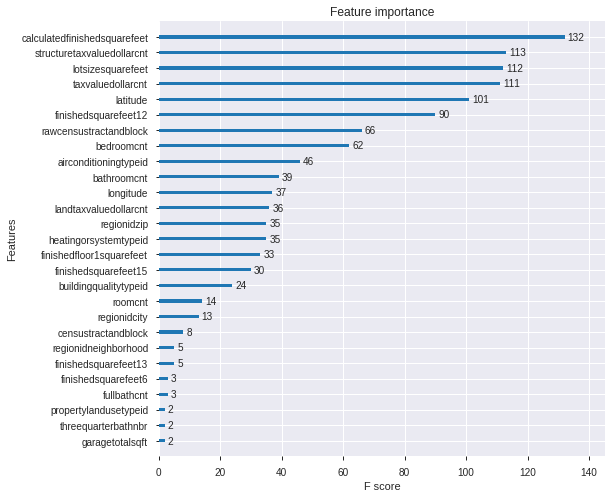

In [119]:
ax = plt.figure(figsize=(8, 8)).gca()
xgb.plot_importance(model, ax=ax)

In [116]:
model.feature_importances_

array([ 0.03968939,  0.        ,  0.        ,  0.0336497 ,  0.05349439,
        0.02070751,  0.        ,  0.        ,  0.02847282,  0.11389129,
        0.07765315,  0.00431406,  0.02588438,  0.        ,  0.00258844,
        0.        ,  0.        ,  0.00258844,  0.        ,  0.00172563,
        0.        ,  0.03019845,  0.08714409,  0.03192407,  0.09663503,
        0.        ,  0.        ,  0.00172563,  0.05694564,  0.01121657,
        0.        ,  0.00431406,  0.03019845,  0.01207938,  0.00172563,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.09749784,  0.09577221,  0.03106126,
        0.        ,  0.        ,  0.        ,  0.0069025 ], dtype=float32)

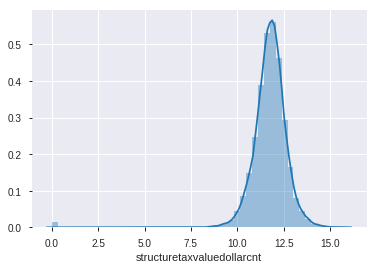

In [73]:
sns.distplot(np.log1p(X_train.structuretaxvaluedollarcnt))

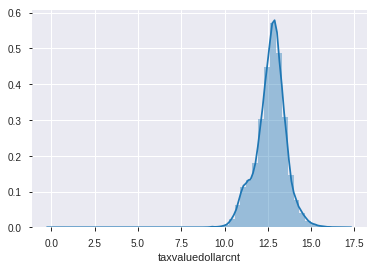

In [72]:
sns.distplot(np.log1p(X_train.taxvaluedollarcnt))

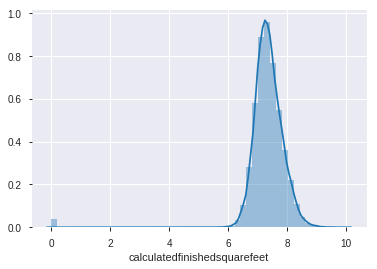

In [71]:
sns.distplot(np.log1p(X_train.calculatedfinishedsquarefeet))

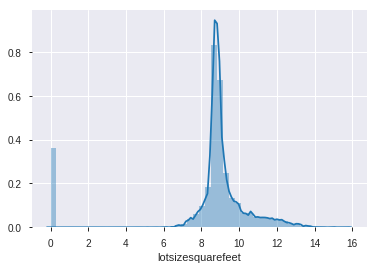

In [75]:
sns.distplot(np.log1p(X_train.lotsizesquarefeet))

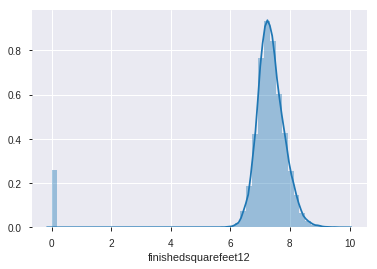

In [76]:
sns.distplot(np.log1p(X_train.finishedsquarefeet12))

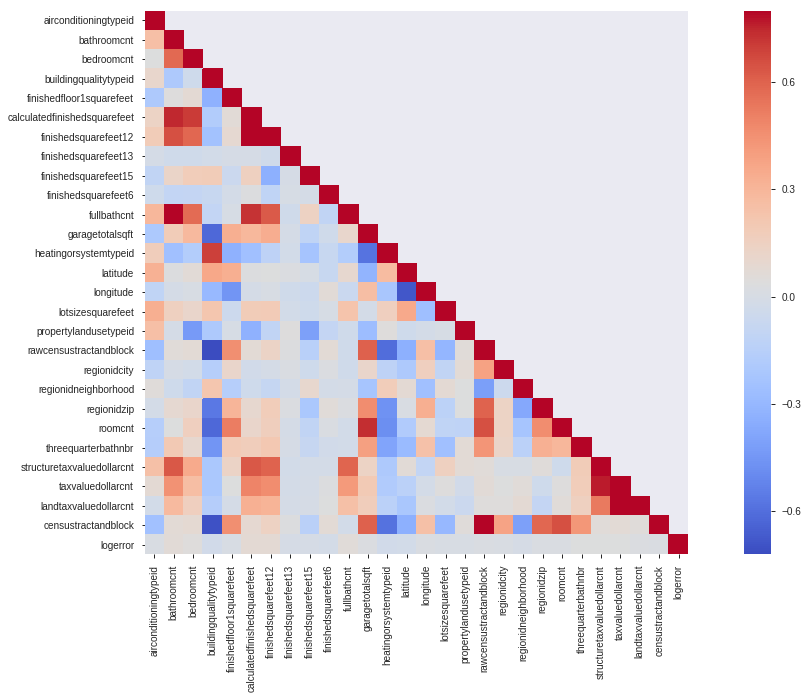

In [133]:
X1 = X_train.copy()
X1['logerror'] = y_train
corrMatt = X1.corr('spearman')
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig, ax= plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, cmap='coolwarm')